In [2]:
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score

warnings.filterwarnings("ignore")

## Dataset

In [3]:

dataset = pd.read_json("sarcasm.json")

## Cleaning

In [4]:
dataset.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [5]:
dataset.tail()

,is_sarcastic,headline,article_link
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...
28618,1,dad clarifies this not a food stop,https://www.theonion.com/dad-clarifies-this-no...


Drop article_link column

In [6]:
df = dataset.drop(["article_link"], axis = 1)

## Tokenizer

In [7]:
VOCAB_SIZE = 30000
tokenizer = Tokenizer(num_words = VOCAB_SIZE, oov_token = "OOV")
tokenizer.fit_on_texts(df.headline.values)
headline_sequences = tokenizer.texts_to_sequences(df.headline.values)

Find maximum length of sublists

In [8]:
headline_sequences[0]

[16004, 355, 3167, 7474, 2644, 3, 661, 1119]

In [9]:
len_each_sublist = [len(sublist) for sublist in headline_sequences]

In [10]:
max(len_each_sublist)

152

Maximum length of sublists is 152

In [11]:
MAX_LEN = 152

### Padding

In [12]:
padded_headline_seq = pad_sequences(headline_sequences, truncating = 'post', padding = 'post', maxlen = MAX_LEN)

## Train Test Split

### Set random state 

In [13]:
RS  = 13

In [14]:
X_train, X_test, y_train, y_test = train_test_split(padded_headline_seq, df.is_sarcastic, test_size = 0.2, random_state = RS)

## Models

In [15]:
EPOCHS_SNN = 100

### Simple Neural Network

In [16]:
def build_snn_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((X_train.shape[1],)))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    model.add(keras.layers.Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [17]:
snn_model = build_snn_model()
snn_history = snn_model.fit(X_train,y_train, epochs = EPOCHS_SNN)

2023-04-03 11:19:04.858015: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-03 11:19:04.858404: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-03 11:19:04.858439: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (amyrmahdy): /proc/driver/nvidia/version does not exist
2023-04-03 11:19:04.859616: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
716/716 [==============================] - 2s 2ms/step - loss: 40.7851 - accuracy: 0.5259
Epoch 2/100
716/716 [==============================] - 1s 1ms/step - loss: 15.4197 - accuracy: 0.5302
Epoch 3/100
716/716 [==============================] - 1s 2ms/step - loss: 7.8462 - accuracy: 0.5430
Epoch 4/100
716/716 [==============================] - 1s 2ms/step - loss: 4.9282 - accuracy: 0.5391
Epoch 5/100
716/716 [==============================] - 2s 2ms/step - loss: 3.3092 - accuracy: 0.5428
Epoch 6/100
716/716 [==============================] - 1s 2ms/step - loss: 2.2043 - accuracy: 0.5414
Epoch 7/100
716/716 [==============================] - 1s 2ms/step - loss: 1.6052 - accuracy: 0.5469
Epoch 8/100
716/716 [==============================] - 1s 2ms/step - loss: 1.1865 - accuracy: 0.5468
Epoch 9/100
716/716 [==============================] - 1s 2ms/step - loss: 0.9167 - accuracy: 0.5511
Epoch 10/100
716/716 [==============================] - 1s 2ms/step - loss: 0.8432 - accu

In [18]:
snn_history_df = pd.DataFrame(snn_history.history)
snn_history_df.index = snn_history_df.index + 1
snn_history_df.reset_index().rename(columns = {"index" : "epochs"})

,epochs,loss,accuracy
0,1,40.785091,0.525879
1,2,15.419674,0.530247
2,3,7.846189,0.542957
3,4,4.928229,0.539070
4,5,3.309157,0.542782
...,...,...,...
95,96,0.662999,0.584975
96,97,0.661783,0.589692
97,98,0.661364,0.588862
98,99,0.661909,0.591658


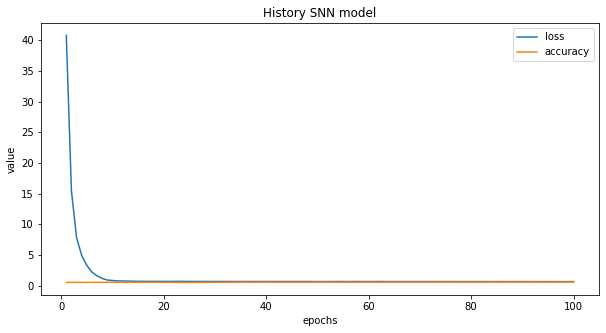

In [19]:
snn_history_df.plot(kind = 'line', figsize = (10,5), xlabel = "epochs", ylabel = "value", title = "History SNN model")
plt.show()

179/179 [==============================] - 0s 991us/step
SNN f1_score: 0.4558790340780862
              precision    recall  f1-score   support

           0       0.57      0.77      0.66      3003
           1       0.59      0.37      0.46      2721

    accuracy                           0.58      5724
   macro avg       0.58      0.57      0.56      5724
weighted avg       0.58      0.58      0.56      5724



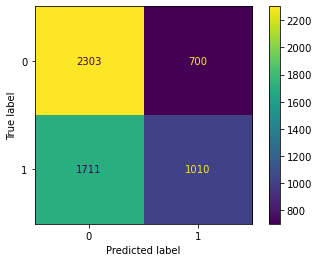

In [20]:
snn_notfinal_predict = snn_model.predict(X_test)
snn_predict = np.where(snn_notfinal_predict > 0.5, 1, 0)
snn_f1_score = f1_score(y_test, snn_predict)
print(f"SNN f1_score: {snn_f1_score}")
snn_class_report = classification_report(y_test, snn_predict)
print(snn_class_report)
snn_conf = confusion_matrix(y_test, snn_predict)
snn_conf_plot = ConfusionMatrixDisplay(snn_conf)
snn_conf_plot.plot()
plt.show()

### Complicated Neural Network (Embedding, Conv1D, MaxPool1D, ...)

In [21]:
EMBEDDING_DIM = 150

EPOCHS_CMP = 30

## Embedding(input_dim, output_dim, input_length = ?)

## Conv1D filters, kernel_size

## MaxPool1D pool_size

In [22]:
def build_cmp_model():
    model = keras.Sequential()
    model.add(keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length = X_train.shape[1]))
    model.add(keras.layers.Conv1D(16, 3, activation = 'relu'))
    model.add(keras.layers.MaxPooling1D(2))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(10, activation = 'relu'))
    model.add(keras.layers.Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [23]:
cmp_model = build_cmp_model()
cmp_history = cmp_model.fit(X_train,y_train, epochs = EPOCHS_CMP)

Epoch 1/30
716/716 [==============================] - 25s 34ms/step - loss: 0.4155 - accuracy: 0.7974
Epoch 2/30
716/716 [==============================] - 24s 33ms/step - loss: 0.1548 - accuracy: 0.9416
Epoch 3/30
716/716 [==============================] - 29s 40ms/step - loss: 0.0475 - accuracy: 0.9846
Epoch 4/30
716/716 [==============================] - 28s 39ms/step - loss: 0.0151 - accuracy: 0.9959
Epoch 5/30
716/716 [==============================] - 27s 38ms/step - loss: 0.0076 - accuracy: 0.9976
Epoch 6/30
716/716 [==============================] - 28s 40ms/step - loss: 0.0051 - accuracy: 0.9985
Epoch 7/30
716/716 [==============================] - 29s 41ms/step - loss: 0.0030 - accuracy: 0.9991
Epoch 8/30
716/716 [==============================] - 29s 40ms/step - loss: 0.0045 - accuracy: 0.9985
Epoch 9/30
716/716 [==============================] - 24s 34ms/step - loss: 0.0071 - accuracy: 0.9976
Epoch 10/30
716/716 [==============================] - 24s 33ms/step - loss: 0.006

In [24]:
cmp_history_df = pd.DataFrame(cmp_history.history)
cmp_history_df.index = cmp_history_df.index + 1
cmp_history_df.reset_index().rename(columns = {"index" : "epochs"})

,epochs,loss,accuracy
0,1,0.415490,0.797379
1,2,0.154794,0.941647
2,3,0.047483,0.984582
3,4,0.015141,0.995894
4,5,0.007579,0.997554
5,6,0.005147,0.998515
6,7,0.003041,0.999083
7,8,0.004451,0.998471
8,9,0.007061,0.997598
9,10,0.006758,0.997903


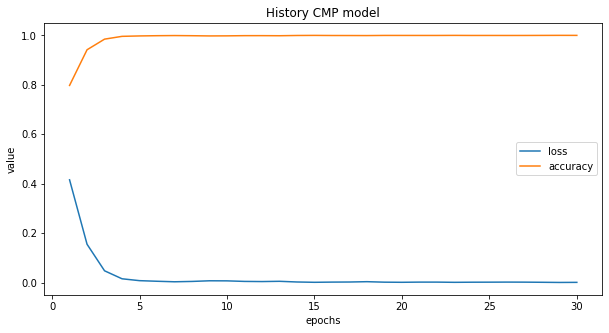

In [25]:
cmp_history_df.plot(kind = 'line', figsize = (10,5), xlabel = "epochs", ylabel = "value", title = "History CMP model")
plt.show()

179/179 [==============================] - 1s 3ms/step
CMP f1_score: 0.8456587482806186
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      3003
           1       0.85      0.81      0.83      2721

    accuracy                           0.85      5724
   macro avg       0.85      0.84      0.85      5724
weighted avg       0.85      0.85      0.85      5724



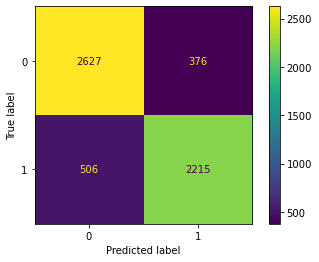

In [26]:
cmp_notfinal_predict = cmp_model.predict(X_test)
cmp_predict = np.where(cmp_notfinal_predict > 0.5, 1, 0)
cmp_f1_score = f1_score(y_test,cmp_predict, average = 'weighted')
print(f"CMP f1_score: {cmp_f1_score}")
cmp_class_report = classification_report(y_test, cmp_predict)
print(cmp_class_report)
cmp_conf = confusion_matrix(y_test, cmp_predict)
cmp_conf_plot = ConfusionMatrixDisplay(cmp_conf)
cmp_conf_plot.plot()
plt.show()

In [27]:
# Author: amyrmahdy
# Date: 14 Jan 2023